In [2]:
! pip install tensorflow

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
import tensorflow
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import math

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/val'

In [6]:
from keras.applications.vgg16 import VGG16

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 327 images belonging to 4 classes.


In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1952 images belonging to 4 classes.


In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
 #Run the cell. It will take some time to execute
for batch in test_set:
    print("Validation batch found!")
    break  # Stop after finding one batch
else:
    print("No validation batches found. Check your test_set configuration.")

Validation batch found!


In [17]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 529s 9s/step - loss: 2.7165 - accuracy: 0.7346 - val_loss: 0.7484 - val_accuracy: 0.8807
Epoch 2/10
61/61 [==============================] - 29s 478ms/step - loss: 0.8141 - accuracy: 0.8694 - val_loss: 0.4821 - val_accuracy: 0.8930
Epoch 3/10
61/61 [==============================] - 29s 482ms/step - loss: 0.5143 - accuracy: 0.9068 - val_loss: 0.4935 - val_accuracy: 0.9113
Epoch 4/10
61/61 [==============================] - 29s 477ms/step - loss: 0.3818 - accuracy: 0.9273 - val_loss: 0.3443 - val_accuracy: 0.9144
Epoch 5/10
61/61 [==============================] - 29s 473ms/step - loss: 0.5339 - accuracy: 0.9150 - val_loss: 0.4394 - val_accuracy: 0.9266
Epoch 6/10
61/61 [==============================] - 29s 480ms/step - loss: 0.4233 - accuracy: 0.9365 - val_loss: 0.3857 - val_accuracy: 0.9388
Epoch 7/10
61/61 [==============================] - 29s 472ms/step - loss: 0.3923 - accuracy: 0.9436 - val_loss: 0.3831 - val_accuracy: 0.9266
E

In [18]:
print(f"Nombre d'images de validation: {test_set.samples}")

Nombre d'images de validation: 327


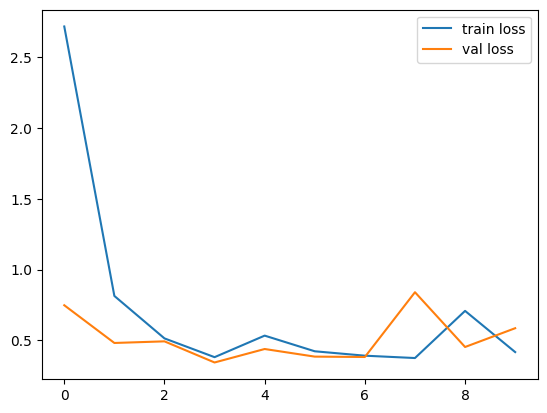

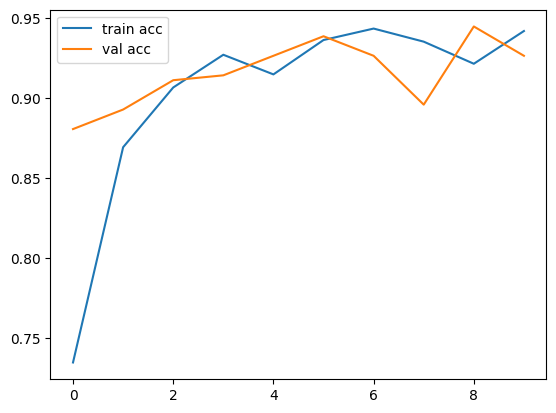

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
